In [25]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from config import *
import time

import seaborn as sns
from datetime import datetime
from pprint import pprint
from itertools import cycle


In [92]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

# Set target account
query = '@SonikGryazzz'
# Add target account to accounts list not to analyse it
accounts = [query]
last_tweet_id = 0

In [93]:
last_tweet_id

0

In [94]:
def sentiment_bot():
    
    mentions = api.search(query, count=10, result_type='recent')
    print(len(mentions))
    
    for tweet in mentions['statuses']:
        tweet_id = tweet['id']
        print(f'tweet id: {tweet_id}')
        global last_tweet_id
        print(f'last id: {last_tweet_id}')
        
        if tweet_id > last_tweet_id:
            try:
                new_acc = (f'@{tweet["entities"]["user_mentions"][-1]["screen_name"]}')
                print(f'new acc to check: {new_acc}')
            
                if not new_acc:
                    break  
                
            except(IndexError):
                continue
            
            if new_acc not in accounts:
                accounts.append(new_acc)
                sender = (f"{tweet['user']['name']} (@{tweet['user']['screen_name']})")
                print(f'sender is {sender}')
                #print('---')
            
                blob_sent(new_acc, sender)
                #api.update_with_media('Output/plot.png', f'New Tweet Analysis of {new_acc}. Thank you {sender}!')
                api.update_with_media('Output/plot.png', f'New Tweet Analysis of .. Thank you ..!')
                print('plot printed')
            else:
                print('We\'ve analyzed it already')
                #print('---------')

    try:
        last_tweet_id = mentions['statuses'][0]['id']
        print(f'new last tweet id: {last_tweet_id}')
        
    
    except(IndexError):
        print('No new account name in the tweet')
    
    


In [95]:
def two_plots(data,send,acc):
    df = pd.DataFrame(data)
    current_date = datetime.now().date().strftime("%d.%m.%Y")
    sns.set()
    
    feature_list = ['Polarity', 'Subjectivity']
    colors = cycle(['g', '#1a75ff'])
    
    plt.figure(figsize=(7,9))
    for i in range(len(feature_list)):
        
        plt.subplot(2,1,i+1)
        plt.plot(df['Tweets Ago'], df[feature_list[i]], marker='o', linewidth=0.3, color=next(colors), alpha=0.9)
        plt.title(f'Sentiment Analysis of {acc} Tweets {feature_list[i]}\n on {current_date}. Requested by {send}')
        plt.ylabel(f'Tweets {feature_list[i]}')
        plt.ylim(-1.1,1.1)
        
    plt.tight_layout()    
    plt.savefig('Output/plot.png')

In [96]:
def blob_sent(acc,send):
    
    total_mood = []
    last_tweet = None
    tweet_counter = 0
    send = send
    acc = acc
    
    for x in range(3):
        
        all_data = api.user_timeline(acc, count=10, max_id=last_tweet, page=x)
        
        for tweet in all_data:
            
            blob = TextBlob(tweet['text'])
            sentiment = blob.sentiment
            total_mood.append({'source': acc,
                             'Polarity': sentiment[0],
                             'Subjectivity': sentiment[1],
                             'Tweets Ago': tweet_counter,
                             'text': tweet['text'],
                             'time': tweet['created_at'],
                              'likes': tweet['favorite_count'],
                              'RT': tweet['retweet_count']})
            tweet_counter -= 1
        last_tweet = tweet["id"] - 1
    
    return two_plots(total_mood,send,acc)

2
tweet id: 982310473952620544
last id: 0
new acc to check: @SonikGryazzz
We've analyzed it already
tweet id: 982289973654077440
last id: 0
new acc to check: @Madonna
sender is Sonya (@SonikGryazzz)
plot printed
tweet id: 982289598507298816
last id: 0
new acc to check: @Cats
sender is Sonya (@SonikGryazzz)
plot printed
new last tweet id: 982310473952620544
2
tweet id: 982311449358929920
last id: 982310473952620544
new acc to check: @tweeter
sender is Sonya (@SonikGryazzz)
plot printed
tweet id: 982289973654077440
last id: 982310473952620544
tweet id: 982289598507298816
last id: 982310473952620544
new last tweet id: 982311449358929920
2
tweet id: 982311449358929920
last id: 982311449358929920
tweet id: 982310473952620544
last id: 982311449358929920
tweet id: 982289973654077440
last id: 982311449358929920
tweet id: 982289598507298816
last id: 982311449358929920
new last tweet id: 982311449358929920


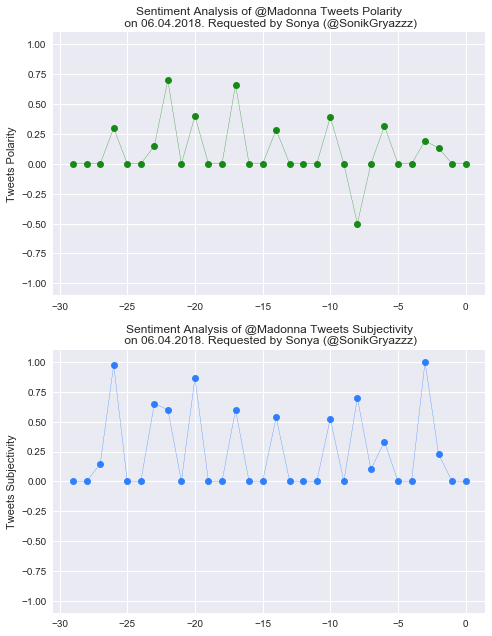

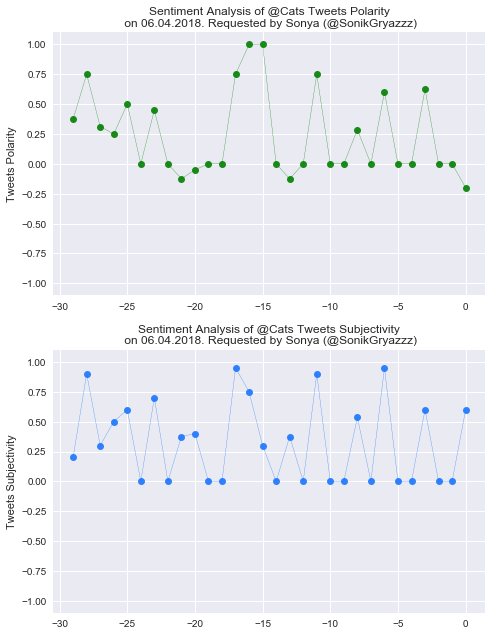

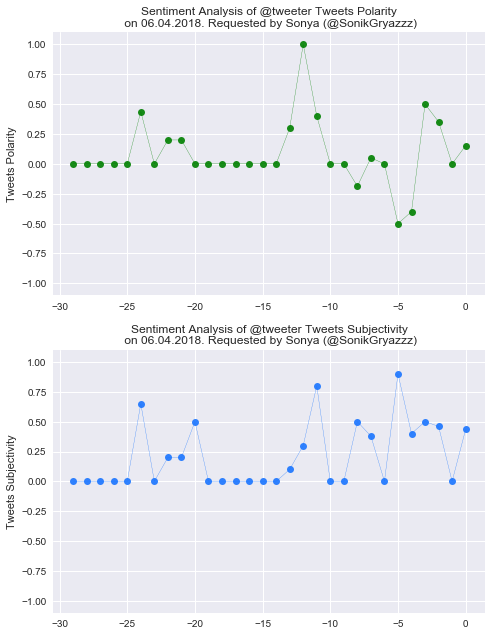

In [97]:
counter = 1

while(True):
    
    sentiment_bot()
    time.sleep(40)
    counter +=1

In [98]:
api.update_status('@SonikGryazzz analyze @rock')

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Apr 06 19:30:51 +0000 2018',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 979490736013021184,
    'id_str': '979490736013021184',
    'indices': [0, 13],
    'name': 'Sonya',
    'screen_name': 'SonikGryazzz'},
   {'id': 95457329,
    'id_str': '95457329',
    'indices': [22, 27],
    'name': 'RIP FREDO',
    'screen_name': 'Rock'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 982339872240390145,
 'id_str': '982339872240390145',
 'in_reply_to_screen_name': 'SonikGryazzz',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': 979490736013021184,
 'in_reply_to_user_id_str': '979490736013021184',
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://www.bootcamp.com" rel="nofollow">Testing_bootcamp_app</a>',
 'text': '@SonikGryazzz analyze @rock',
 'tr

In [ ]:
for tweet in mentions['statuses']:
    tweet_id = tweet['id']
    print(tweet_id)
    if tweet_id > last_tweet_id:
        try:
            new_acc = (f'@{tweet["entities"]["user_mentions"][-1]["screen_name"]}')
            print(f'new acc to check: {new_acc}')
            
            if not new_acc:
                break  
                
        except(IndexError):
            print('')
            
        if new_acc not in accounts:
            accounts.append(new_acc)
            sender = (f"{tweet['user']['name']} (@{tweet['user']['screen_name']})")
             
            print(f'sender is {sender}')
            print('---')
            
            blob_sent(new_acc, sender)
            api.update_with_media('Output/plot.png', f'New Tweet Analysis of {new_acc}. Thank you {sender}!')
            
        else:
            print('We\'ve analyzed it already')
            print('---------')

try:
    mentions['statuses'][0]['id'] = tweet_id
except(IndexError):
    print('No new account name in the tweet')

mentions = api.search(query, count=5, result_type='recent')

for tweet in mentions['statuses']:
    
    tweet_id = tweet['id']
    print(tweet_id)
    
    if tweet_id > last_tweet_id:
        
        try:
            new_acc = recent_tweet['entities']['user_mentions'][0]['screen_name']
            print(new_acc)
        
            if not new_acc:
                break
                
            sender = tweet['user']['screen_name']
            print(sender)
               
        except(IndexError):
            print('No new account name in the tweet')
        
        if new_acc not in accounts:
            accounts.append(f'@{new_acc}')
            #blob_sent(new_acc,sender)
        else:
            print('We\'ve analyzed it already')

recent_tweet = api.user_timeline(count=1, result_type='recent')

if last_tweet_id < recent_tweet[0]['id']:
    last_tweet_id = recent_tweet[0]['id']
new_acc = ''

try:
    new_acc = recent_tweet[0]['entities']['user_mentions'][-1]['screen_name']
except(IndexError):
    print('No account name in the tweet')

if (new_acc):
    print(new_acc)
    if new_acc not in accounts:
        accounts.append(f'@{new_acc}')
        #blob_sent(new_acc)
else:
    print('No new accounts to analyze')

In [ ]:
#api.update_with_media('Ouptut/plot.png', f'New Tweet analysis. Thank you {sender}!')

In [ ]:
#api.update_status('Test @SonikGryazzz Test tweet')

In [ ]:
#df = pd.DataFrame(testdata)

In [ ]:
#plt.plot(df['Tweets Ago'], df[i], marker='o', linewidth=0.3, color=next(colors), alpha=0.9)

In [ ]:
#two_plots(testdata, 'Sonya (@SonikGryazzz)', '@goingoutguide')

In [ ]:
# Function for plotting
def senti_plot(data,send,acc):
    df = pd.DataFrame(data)
    current_date = datetime.now().date().strftime("%d.%m.%Y")
    sns.set()
    
    #plt.figure()
    ax = df.plot(kind='line', x='Tweets Ago', y='Polarity', marker='o', linewidth=0.3, color='g', alpha=0.9)
    ax.set_ylim(-1.1, 1.1)
    ax.set_ylabel('Tweets Polarity')
    ax.set_title(f'Sentiment Analysis of Tweets by {acc} on ({current_date})\n Requested by {send}')
    plt.savefig('Output/plot.png')
    #return()

In [ ]:
#testdata = blob_sent('@goingoutguide', 'Sonya (@SonikGryazzz)')

In [ ]:
# Vader sentiment analysis
def senti_get(acc):
    
    total_mood = []
    last_tweet = None
    tweet_counter = 0
    
    for x in range(10):

        all_data = api.user_timeline(acc, count=50, max_id=last_tweet, page=x)
        
        for tweet in all_data:
            
            emotions = analyzer.polarity_scores(tweet['text'])
            
            total_mood.append({'source': acc,
                             'Polarity': emotions['compound'],
                             'positive': emotions['pos'],
                             'negative': emotions['neg'],
                             'neutral': emotions['neu'],
                             'Tweets Ago': tweet_counter,
                             'text': tweet['text'],
                             'time': tweet['created_at'],
                              'likes': tweet['favorite_count'],
                              'RT': tweet['retweet_count']})
            
            tweet_counter -= 1

        last_tweet = tweet["id"] - 1
    return(total_mood)